In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('final_results.txt')
raw_data

,[[[0.5494407253265381,1.1621357031166553,0.9004231326586934,0.8328745750212418,0.8328745750212448],[0.17392408943176269,0.0953372297808528,0.2830659409918648,0.9862896598691393,0.9862896598691396],...,[0.5851973419189453,1.0208016008138656,0.9827967296819369,0.8571577970291582,0.8571577970291606],[0.7795715651512146,1.6660493201017381,1.2907222561696983,0.7668673818700896,0.7668673818700938]]]


In [3]:
f = open("final_results.txt", "r")
content = f.readline()
f.close()

In [4]:
import pandas as pd
import ast

# Since the content of the file looks like a Python list of lists, we can try to parse it using ast.literal_eval
# This will convert the string representation of the list into an actual Python list
data = ast.literal_eval(content)

# Creating a DataFrame from the nested list
# First, we'll flatten the list while keeping track of the indices for functions and regularisation techniques
function_labels = [f"f{i+1}" for i in range(10)]
regularisation_techniques = [
    "Baseline",
    "L1",
    "L2",
    "Elastic Net",
    "Dropout",
    "Noise Injection",
    "Batch Normalisation",
]
metrics_labels = ["MAV", "MSE", "RMSE", "R Squared", "Explained Var"]

# Flattening the list
rows = []
for i, function_data in enumerate(data):
    for j, reg_data in enumerate(function_data):
        row = {
            "Function": function_labels[i],
            "Regularisation": regularisation_techniques[j],
            "MAV": reg_data[0],
            "MSE": reg_data[1],
            "RMSE": reg_data[2],
            "R Squared": reg_data[3],
            "Explained Var": reg_data[4],
        }
        rows.append(row)

# Creating the DataFrame
df = pd.DataFrame(rows)
df.head()

,Function,Regularisation,MAV,MSE,RMSE,R Squared,Explained Var
0,f1,Baseline,0.549441,1.162136,0.900423,0.832875,0.832875
1,f1,L1,0.173924,0.095337,0.283066,0.986290,0.986290
2,f1,L2,0.354514,0.464765,0.624564,0.933163,0.933163
3,f1,Elastic Net,0.326191,0.497733,0.624154,0.928422,0.928422
4,f1,Dropout,0.429633,0.681282,0.698620,0.902026,0.902026


In [8]:
x = df.to_latex(index=False)

print(x)

\begin{tabular}{llrrrrr}
\toprule
Function &      Regularisation &      MAV &      MSE &     RMSE &  R Squared &  Explained Var \\
\midrule
      f1 &            Baseline & 0.549441 & 1.162136 & 0.900423 &   0.832875 &       0.832875 \\
      f1 &                  L1 & 0.173924 & 0.095337 & 0.283066 &   0.986290 &       0.986290 \\
      f1 &                  L2 & 0.354514 & 0.464765 & 0.624564 &   0.933163 &       0.933163 \\
      f1 &         Elastic Net & 0.326191 & 0.497733 & 0.624154 &   0.928422 &       0.928422 \\
      f1 &             Dropout & 0.429633 & 0.681282 & 0.698620 &   0.902026 &       0.902026 \\
      f1 &     Noise Injection & 1.434433 & 3.694649 & 1.894113 &   0.468677 &       0.468677 \\
      f1 & Batch Normalisation & 1.701451 & 4.930401 & 2.220381 &   0.290965 &       0.290965 \\
      f2 &            Baseline & 0.158436 & 0.158673 & 0.358616 &   0.978546 &       0.978546 \\
      f2 &                  L1 & 0.144247 & 0.132630 & 0.291178 &   0.982067 &      

This table provides a concise summary of the average performance of each regularization technique across all metrics and functions:

In [25]:
# Averaging the metrics for each regularization technique across all functions
average_metrics = df.groupby("Regularisation").mean().reset_index()

# Selecting only the relevant columns (regularization and metrics)
average_metrics = average_metrics[
    ["Regularisation", "MAV", "MSE", "RMSE", "R Squared", "Explained Var"]
]

average_metrics

,Regularisation,MAV,MSE,RMSE,R Squared,Explained Var
0,Baseline,0.257096,0.423944,0.484667,0.728446,0.728446
1,Batch Normalisation,0.768500,1.949487,1.226954,0.474837,0.474837
2,Dropout,0.236215,0.347442,0.458580,0.736696,0.736696
3,Elastic Net,0.205031,0.291648,0.382041,0.753228,0.753228
4,L1,0.169648,0.183592,0.324000,0.771691,0.771691
5,L2,0.185293,0.200575,0.365501,0.757745,0.757745
6,Noise Injection,0.641208,1.442949,1.048225,0.554430,0.554430


Removing f3 and f9:

In [26]:
# Filtering out data for functions f3 and f9 before averaging
df_filtered = df[(df["Function"] != "f3") & (df["Function"] != "f9")]

# Averaging the metrics for each regularization technique across the remaining functions
average_metrics_filtered = df_filtered.groupby("Regularisation").mean().reset_index()

# Selecting only the relevant columns (regularization and metrics)
average_metrics_filtered = average_metrics_filtered[
    ["Regularisation", "MAV", "MSE", "RMSE", "R Squared", "Explained Var"]
]

average_metrics_filtered

,Regularisation,MAV,MSE,RMSE,R Squared,Explained Var
0,Baseline,0.266813,0.439294,0.470145,0.908189,0.908189
1,Batch Normalisation,0.905976,2.345817,1.397756,0.591746,0.591746
2,Dropout,0.240685,0.343588,0.437493,0.918569,0.918569
3,Elastic Net,0.201659,0.273836,0.341783,0.939535,0.939535
4,L1,0.157408,0.139271,0.269549,0.961842,0.961842
5,L2,0.177029,0.160284,0.321325,0.944400,0.944400
6,Noise Injection,0.746821,1.712710,1.174362,0.691365,0.691365


In [28]:
latex_code = average_metrics_filtered.to_latex(index=False)
latex_code

'\\begin{tabular}{lrrrrr}\n\\toprule\n     Regularisation &      MAV &      MSE &     RMSE &  R Squared &  Explained Var \\\\\n\\midrule\n           Baseline & 0.266813 & 0.439294 & 0.470145 &   0.908189 &       0.908189 \\\\\nBatch Normalisation & 0.905976 & 2.345817 & 1.397756 &   0.591746 &       0.591746 \\\\\n            Dropout & 0.240685 & 0.343588 & 0.437493 &   0.918569 &       0.918569 \\\\\n        Elastic Net & 0.201659 & 0.273836 & 0.341783 &   0.939535 &       0.939535 \\\\\n                 L1 & 0.157408 & 0.139271 & 0.269549 &   0.961842 &       0.961842 \\\\\n                 L2 & 0.177029 & 0.160284 & 0.321325 &   0.944400 &       0.944400 \\\\\n    Noise Injection & 0.746821 & 1.712710 & 1.174362 &   0.691365 &       0.691365 \\\\\n\\bottomrule\n\\end{tabular}\n'

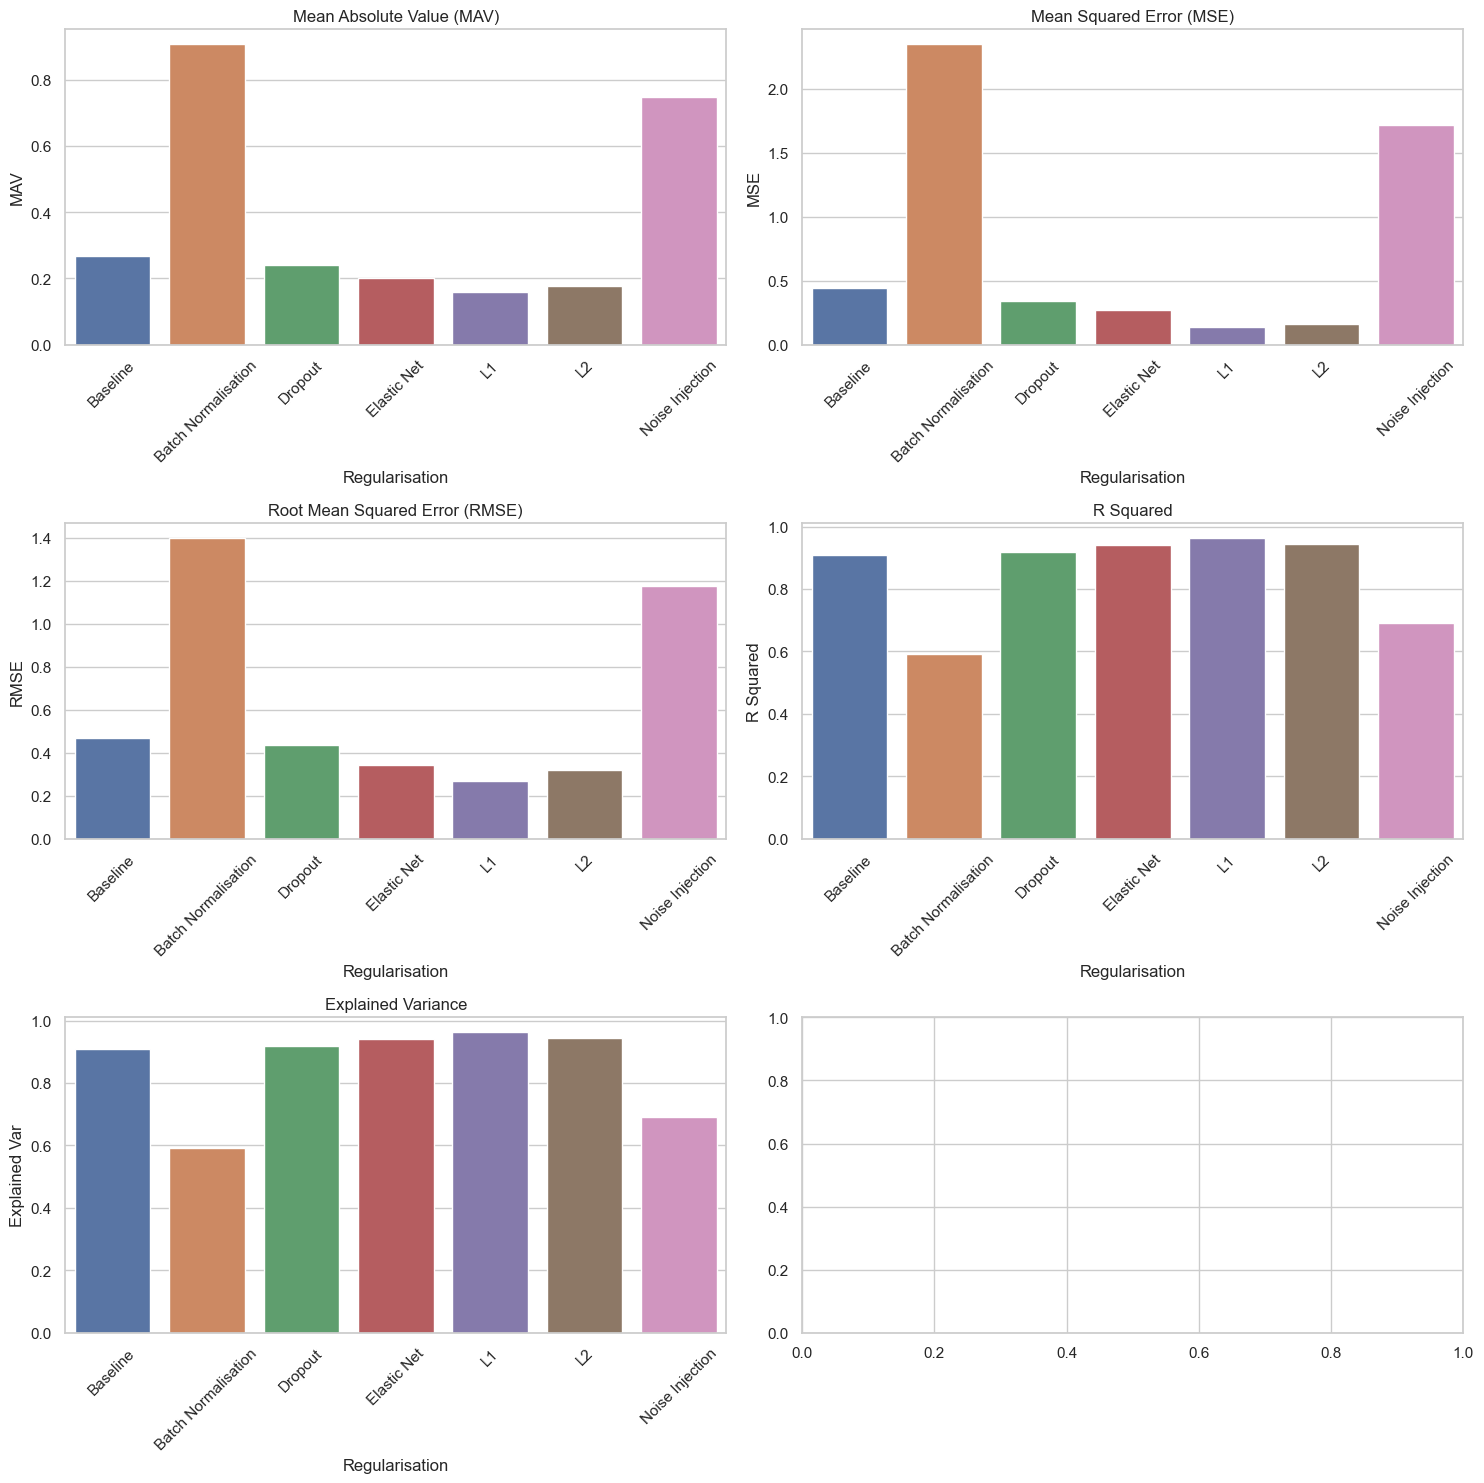

In [27]:
# Creating bar plots for each metric in the filtered average metrics DataFrame
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plotting MAV
sns.barplot(ax=axes[0, 0], x="Regularisation", y="MAV", data=average_metrics_filtered)
axes[0, 0].set_title("Mean Absolute Value (MAV)")
axes[0, 0].tick_params(axis="x", rotation=45)

# Plotting MSE
sns.barplot(ax=axes[0, 1], x="Regularisation", y="MSE", data=average_metrics_filtered)
axes[0, 1].set_title("Mean Squared Error (MSE)")
axes[0, 1].tick_params(axis="x", rotation=45)

# Plotting RMSE
sns.barplot(ax=axes[1, 0], x="Regularisation", y="RMSE", data=average_metrics_filtered)
axes[1, 0].set_title("Root Mean Squared Error (RMSE)")
axes[1, 0].tick_params(axis="x", rotation=45)

# Plotting R Squared
sns.barplot(
    ax=axes[1, 1], x="Regularisation", y="R Squared", data=average_metrics_filtered
)
axes[1, 1].set_title("R Squared")
axes[1, 1].tick_params(axis="x", rotation=45)

# Plotting Explained Variance
sns.barplot(
    ax=axes[2, 0], x="Regularisation", y="Explained Var", data=average_metrics_filtered
)
axes[2, 0].set_title("Explained Variance")
axes[2, 0].tick_params(axis="x", rotation=45)

# Adjusting layout for better visibility
plt.tight_layout()
plt.show()

The bar plots visualize the average performance of each regularization technique across all functions, excluding functions f3 and f9, for five different metrics:

1. Mean Absolute Value (MAV): Shows the average magnitude of the errors. Lower values indicate better performance.
2. Mean Squared Error (MSE): Represents the average of the squares of the errors. Lower values are better.
3. Root Mean Squared Error (RMSE): Similar to MSE but in the same units as the target variable. Lower values indicate better performance.
4. R Squared: A measure of how well the model's predictions approximate the real data points. Higher values indicate better performance.
5. Explained Variance: Indicates the proportion of the total variation in the dependent variable that is captured by the model. Higher values are better.

#### ------------------

Given this structure, the data can be visualized and analyzed in several ways. For instance, we could create plots to compare:

1. The performance of different regularization techniques for each function.
2. The performance of each function across different regularization techniques.
3. The overall performance of regularization techniques across all functions.

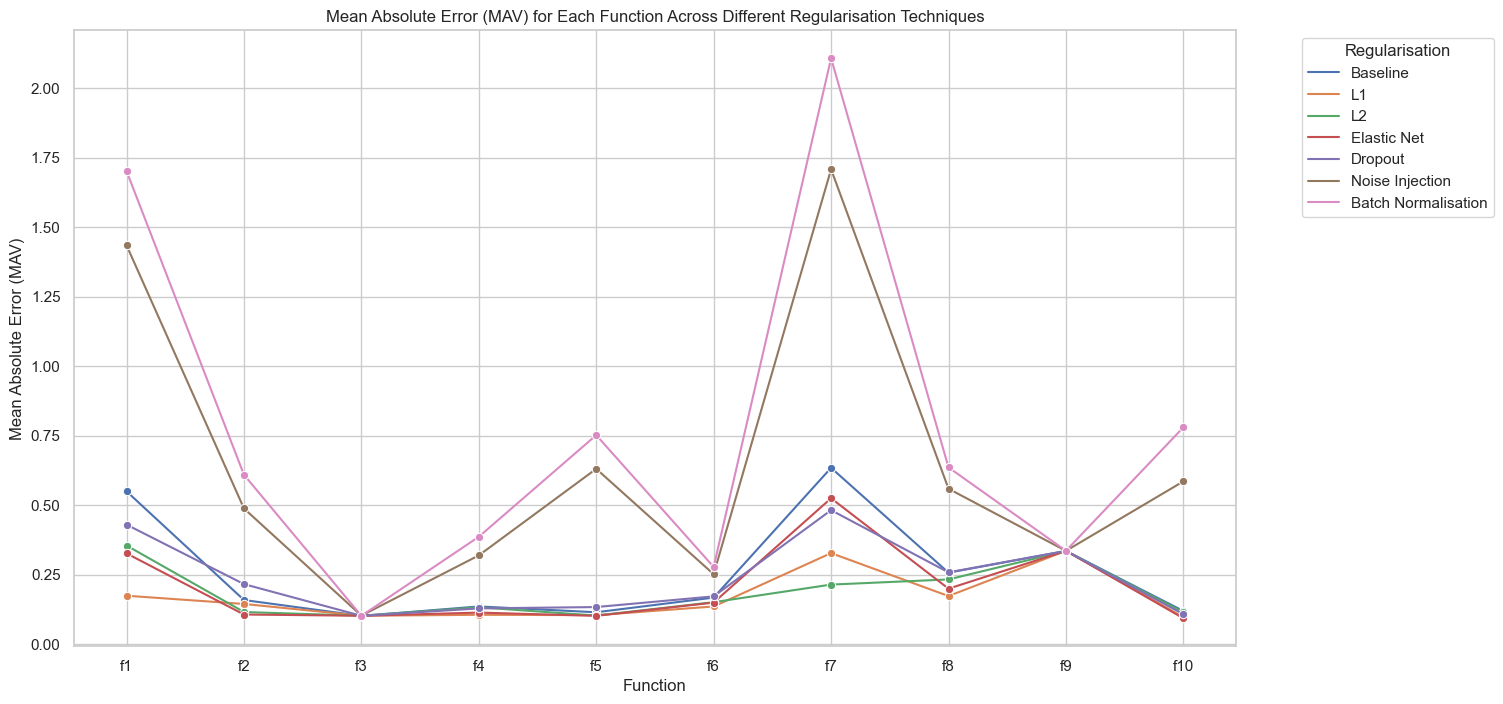

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Plotting MAV for each function and regularisation technique
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x="Function", y="MAV", hue="Regularisation", marker="o")
plt.title(
    "Mean Absolute Error (MAV) for Each Function Across Different Regularisation Techniques"
)
plt.xlabel("Function")
plt.ylabel("Mean Absolute Error (MAV)")
plt.legend(title="Regularisation", bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

The line plot above shows the Mean Absolute Error (MAV) for each function across different regularization techniques. Here are some observations:

- There's a variation in MAV across different functions, suggesting that the effectiveness of regularization techniques varies depending on the function.
- For some functions (like f1 and f2), certain regularization techniques (like L1 and Elastic Net) significantly reduce the MAV compared to the baseline.
- Other functions (like f3, f4) show less variation in MAV across different regularization techniques, indicating that these functions might be less sensitive to regularization.

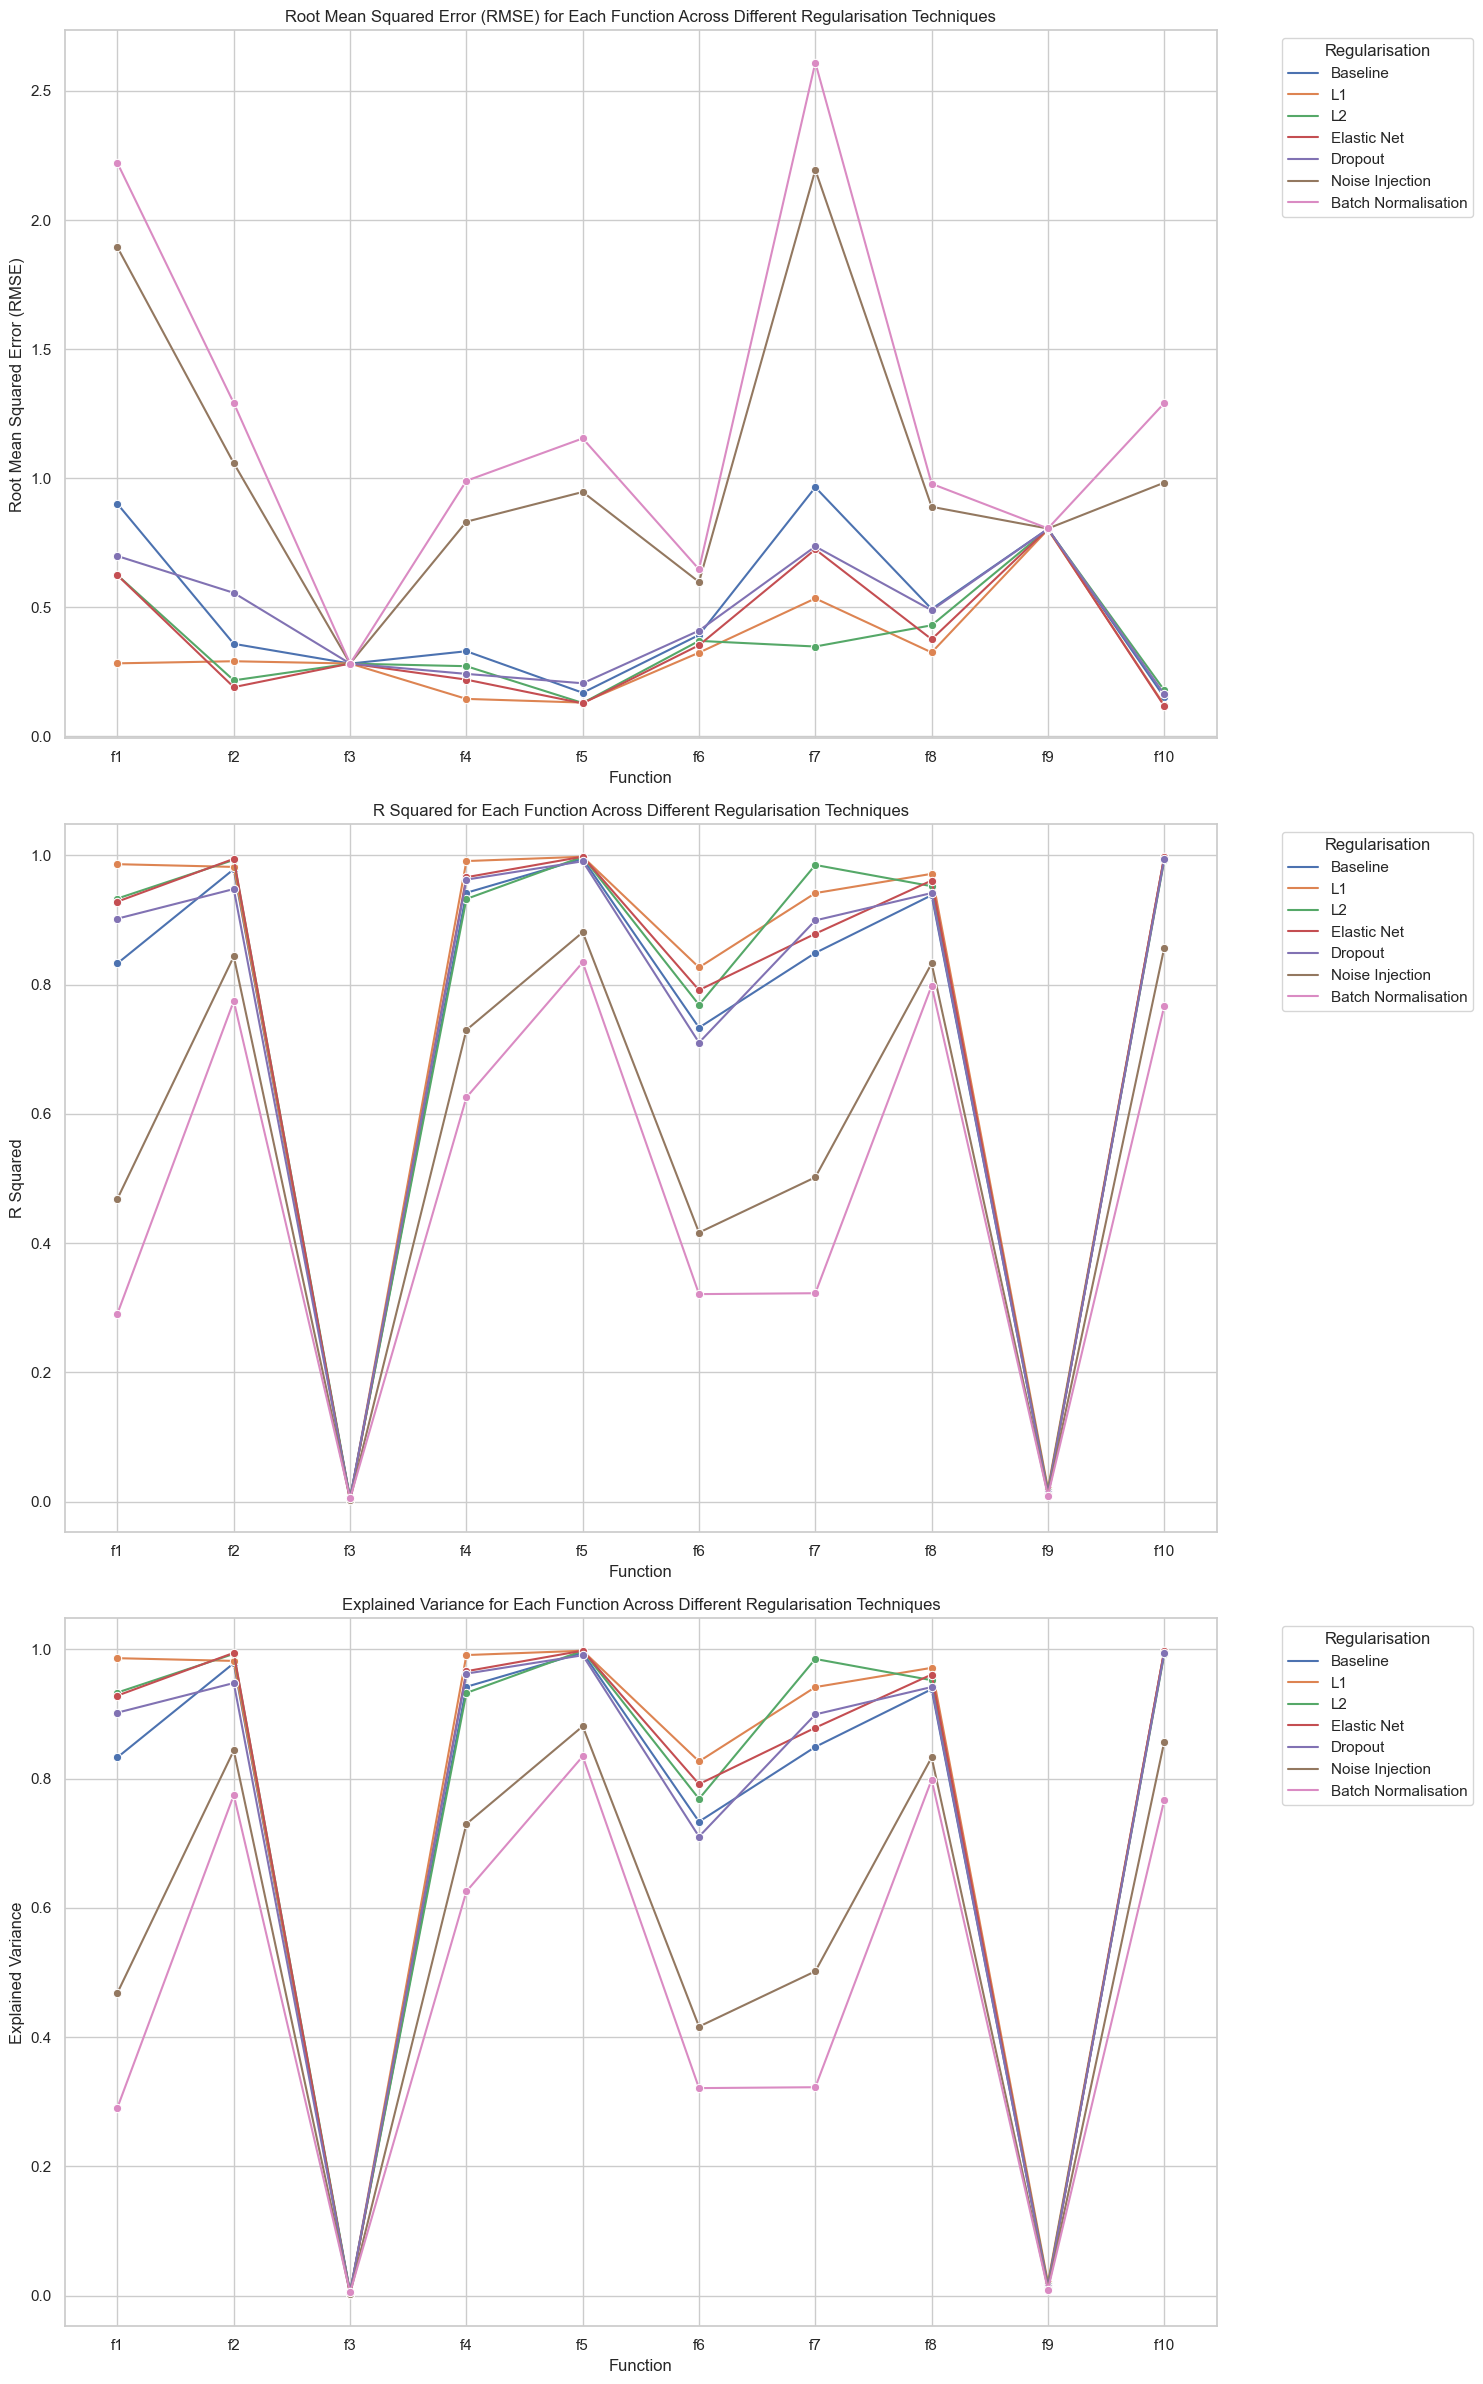

In [14]:
# Updating the column label from 'SE' to 'MSE' for clarity
df.rename(columns={"SE": "MSE"}, inplace=True)

# Now, let's plot RMSE, R Squared, and Explained Variance for each function and regularisation technique
# Creating subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 24))

# RMSE Plot
sns.lineplot(
    ax=axes[0], data=df, x="Function", y="RMSE", hue="Regularisation", marker="o"
)
axes[0].set_title(
    "Root Mean Squared Error (RMSE) for Each Function Across Different Regularisation Techniques"
)
axes[0].set_xlabel("Function")
axes[0].set_ylabel("Root Mean Squared Error (RMSE)")
axes[0].legend(title="Regularisation", bbox_to_anchor=(1.05, 1), loc=2)

# R Squared Plot
sns.lineplot(
    ax=axes[1], data=df, x="Function", y="R Squared", hue="Regularisation", marker="o"
)
axes[1].set_title(
    "R Squared for Each Function Across Different Regularisation Techniques"
)
axes[1].set_xlabel("Function")
axes[1].set_ylabel("R Squared")
axes[1].legend(title="Regularisation", bbox_to_anchor=(1.05, 1), loc=2)

# Explained Variance Plot
sns.lineplot(
    ax=axes[2],
    data=df,
    x="Function",
    y="Explained Var",
    hue="Regularisation",
    marker="o",
)
axes[2].set_title(
    "Explained Variance for Each Function Across Different Regularisation Techniques"
)
axes[2].set_xlabel("Function")
axes[2].set_ylabel("Explained Variance")
axes[2].legend(title="Regularisation", bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()
plt.show()

The visualizations provide insights into how different regularization techniques affect various metrics across the functions:

1. Root Mean Squared Error (RMSE):
- Similar to MAV, RMSE varies across functions and regularization techniques.
- Some functions show a significant improvement in RMSE with certain regularization techniques compared to the baseline.

2. R Squared:
- This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
- Higher values indicate better performance. We see that for some functions, certain regularization techniques (like L1, Elastic Net) perform much better than others.

3. Explained Variance:
- This metric measures the proportion of the total variation in the dependent variable that is captured by the model.
- The trends in Explained Variance are somewhat similar to those in R Squared, indicating consistency in how well the models explain the variance of the data.
  
From these plots, it's clear that the choice of function and regularization technique significantly impacts the performance of the model, as measured by these metrics. This kind of analysis can be very useful for identifying which combinations of functions and regularization techniques work best for a given dataset and problem.

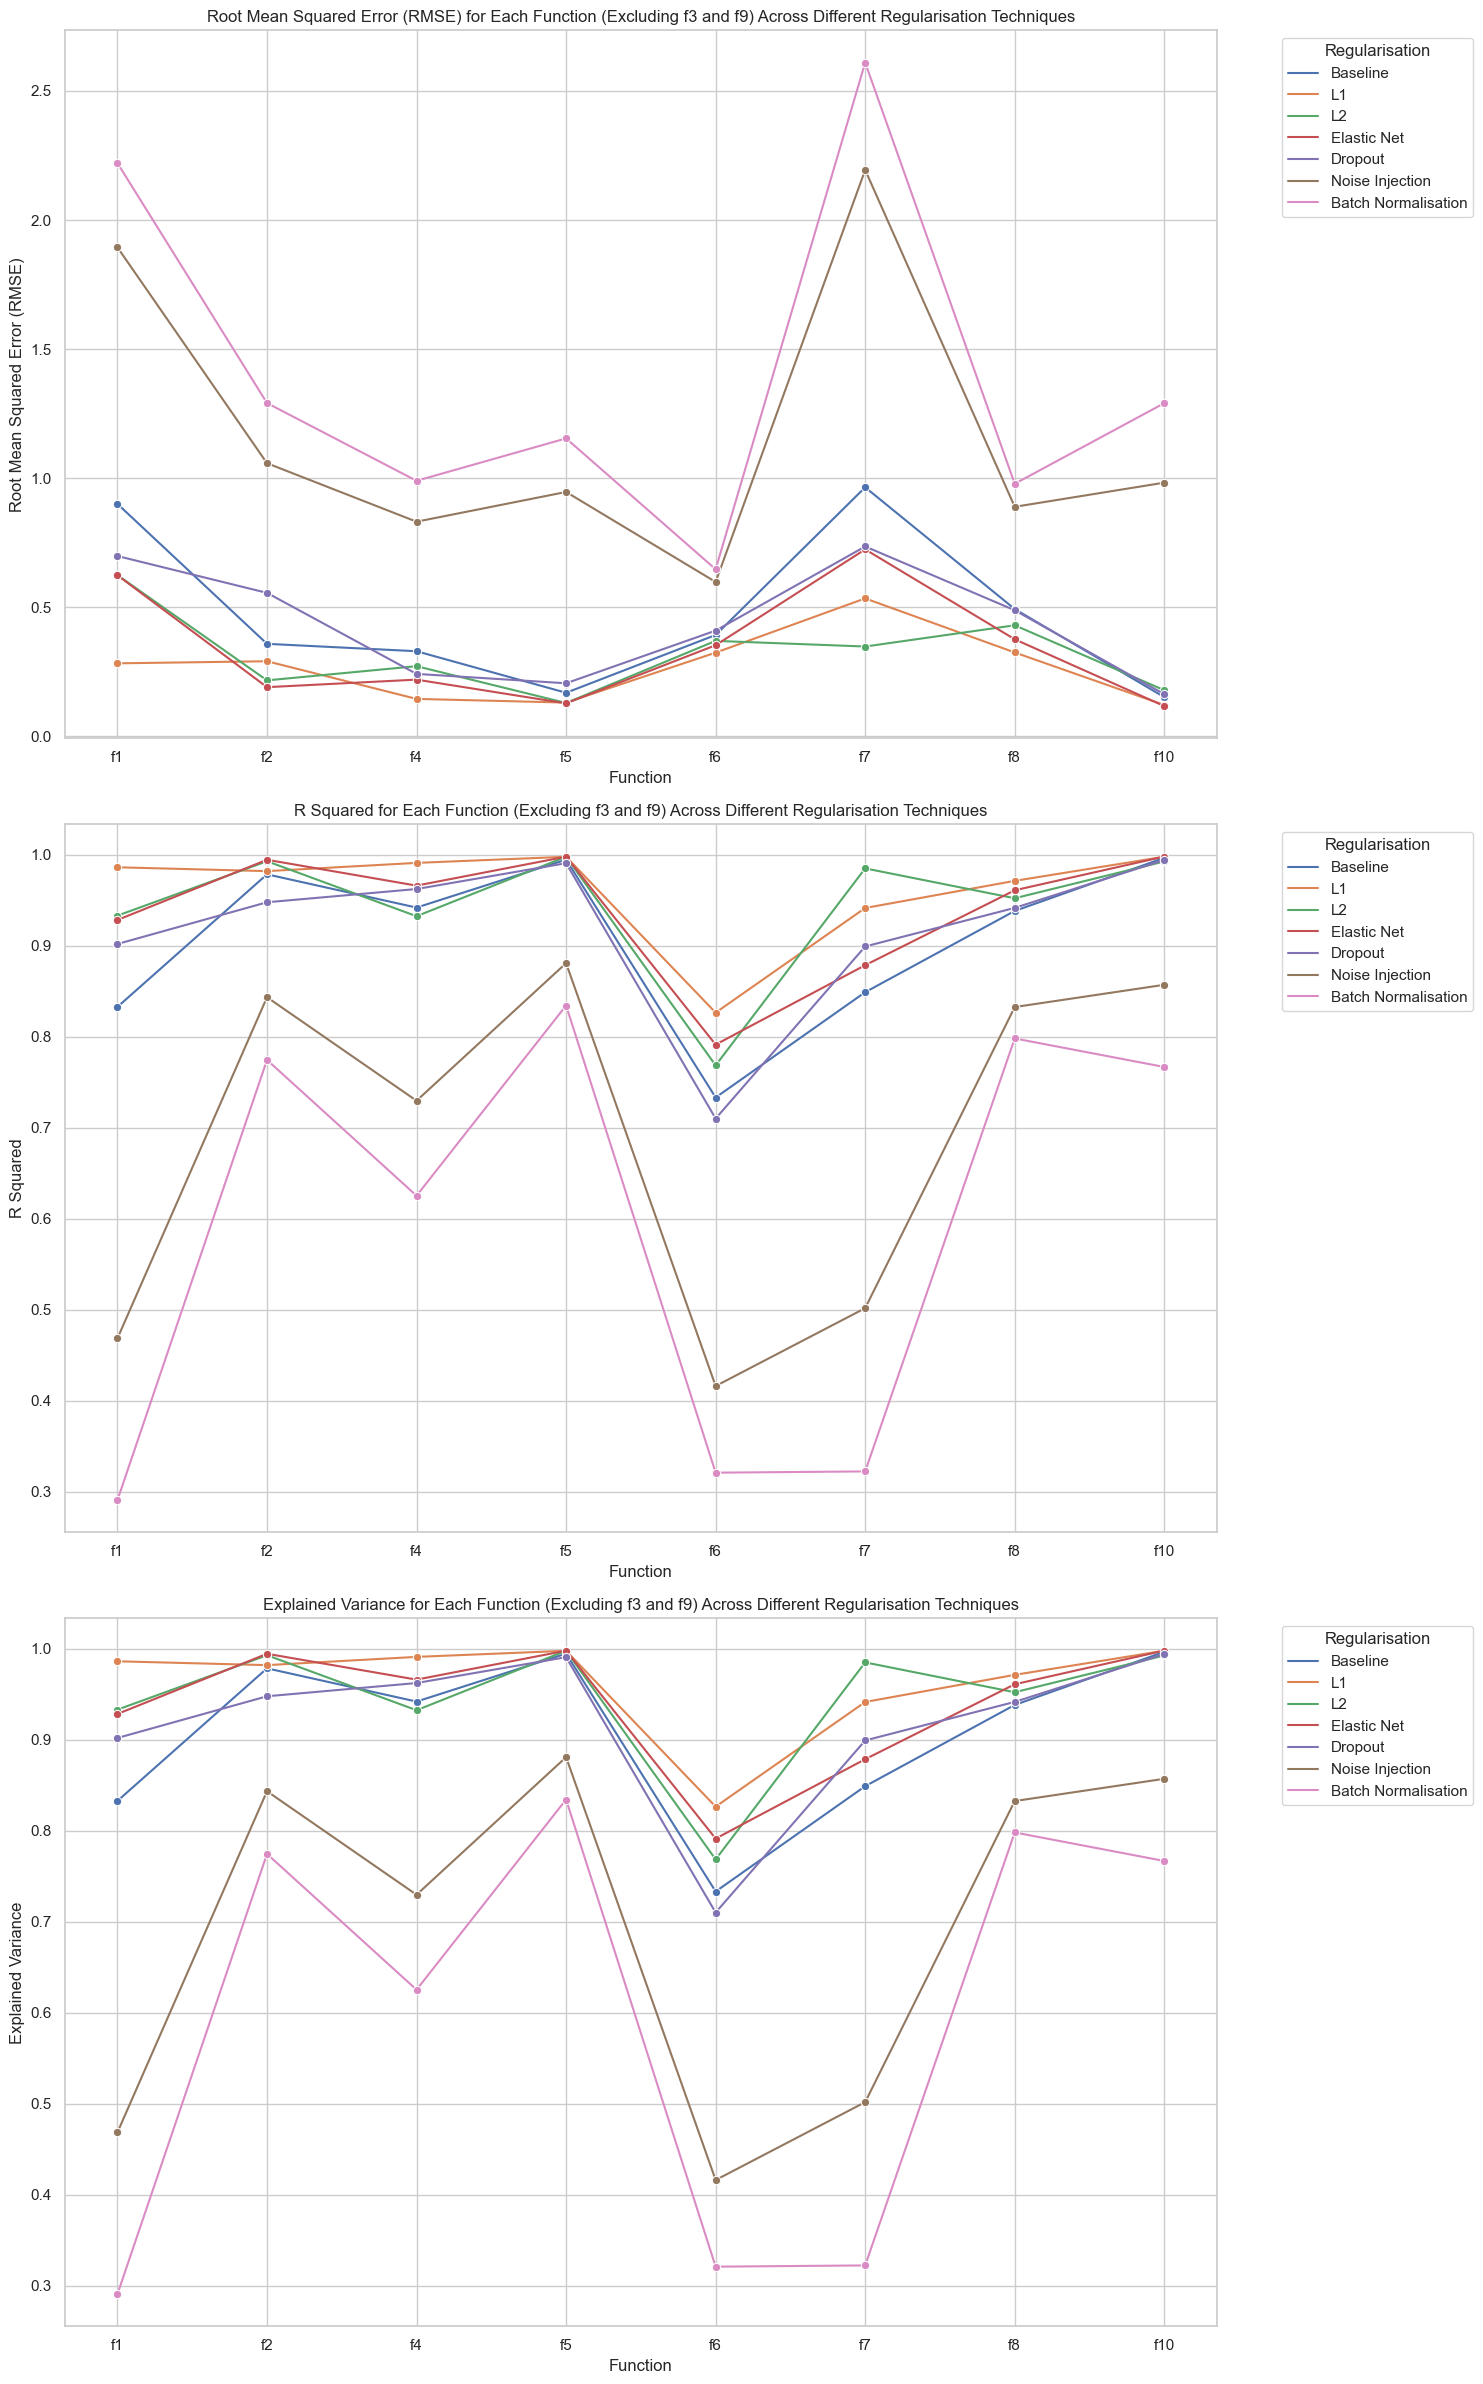

In [15]:
# Filtering out data for functions f3 and f9
df_filtered = df[(df["Function"] != "f3") & (df["Function"] != "f9")]

# Creating subplots for the filtered data, excluding functions f3 and f9
fig, axes = plt.subplots(3, 1, figsize=(15, 24))

# RMSE Plot for filtered data
sns.lineplot(
    ax=axes[0],
    data=df_filtered,
    x="Function",
    y="RMSE",
    hue="Regularisation",
    marker="o",
)
axes[0].set_title(
    "Root Mean Squared Error (RMSE) for Each Function (Excluding f3 and f9) Across Different Regularisation Techniques"
)
axes[0].set_xlabel("Function")
axes[0].set_ylabel("Root Mean Squared Error (RMSE)")
axes[0].legend(title="Regularisation", bbox_to_anchor=(1.05, 1), loc=2)

# R Squared Plot for filtered data
sns.lineplot(
    ax=axes[1],
    data=df_filtered,
    x="Function",
    y="R Squared",
    hue="Regularisation",
    marker="o",
)
axes[1].set_title(
    "R Squared for Each Function (Excluding f3 and f9) Across Different Regularisation Techniques"
)
axes[1].set_xlabel("Function")
axes[1].set_ylabel("R Squared")
axes[1].legend(title="Regularisation", bbox_to_anchor=(1.05, 1), loc=2)

# Explained Variance Plot for filtered data
sns.lineplot(
    ax=axes[2],
    data=df_filtered,
    x="Function",
    y="Explained Var",
    hue="Regularisation",
    marker="o",
)
axes[2].set_title(
    "Explained Variance for Each Function (Excluding f3 and f9) Across Different Regularisation Techniques"
)
axes[2].set_xlabel("Function")
axes[2].set_ylabel("Explained Variance")
axes[2].legend(title="Regularisation", bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()
plt.show()

The updated visualizations exclude data for functions f3 and f9, providing a clearer view of the remaining functions:

1. Root Mean Squared Error (RMSE):
- The trends in RMSE across different regularization techniques are more distinct with the exclusion of f3 and f9.
- For some functions, specific regularization techniques significantly reduce RMSE compared to others.

2. R Squared:
- The differences in R Squared values across functions and regularization techniques are more pronounced in this filtered view.
- This metric provides insights into how well the model's predictions match the variance in the data, with higher values indicating better performance.

3. Explained Variance:
- The patterns in Explained Variance are clearer, showing how effectively each regularization technique captures the variance in the dataset for different functions.
- Excluding functions f3 and f9 appears to simplify the analysis, potentially making it easier to draw conclusions about the effectiveness of different regularization techniques for the remaining functions.

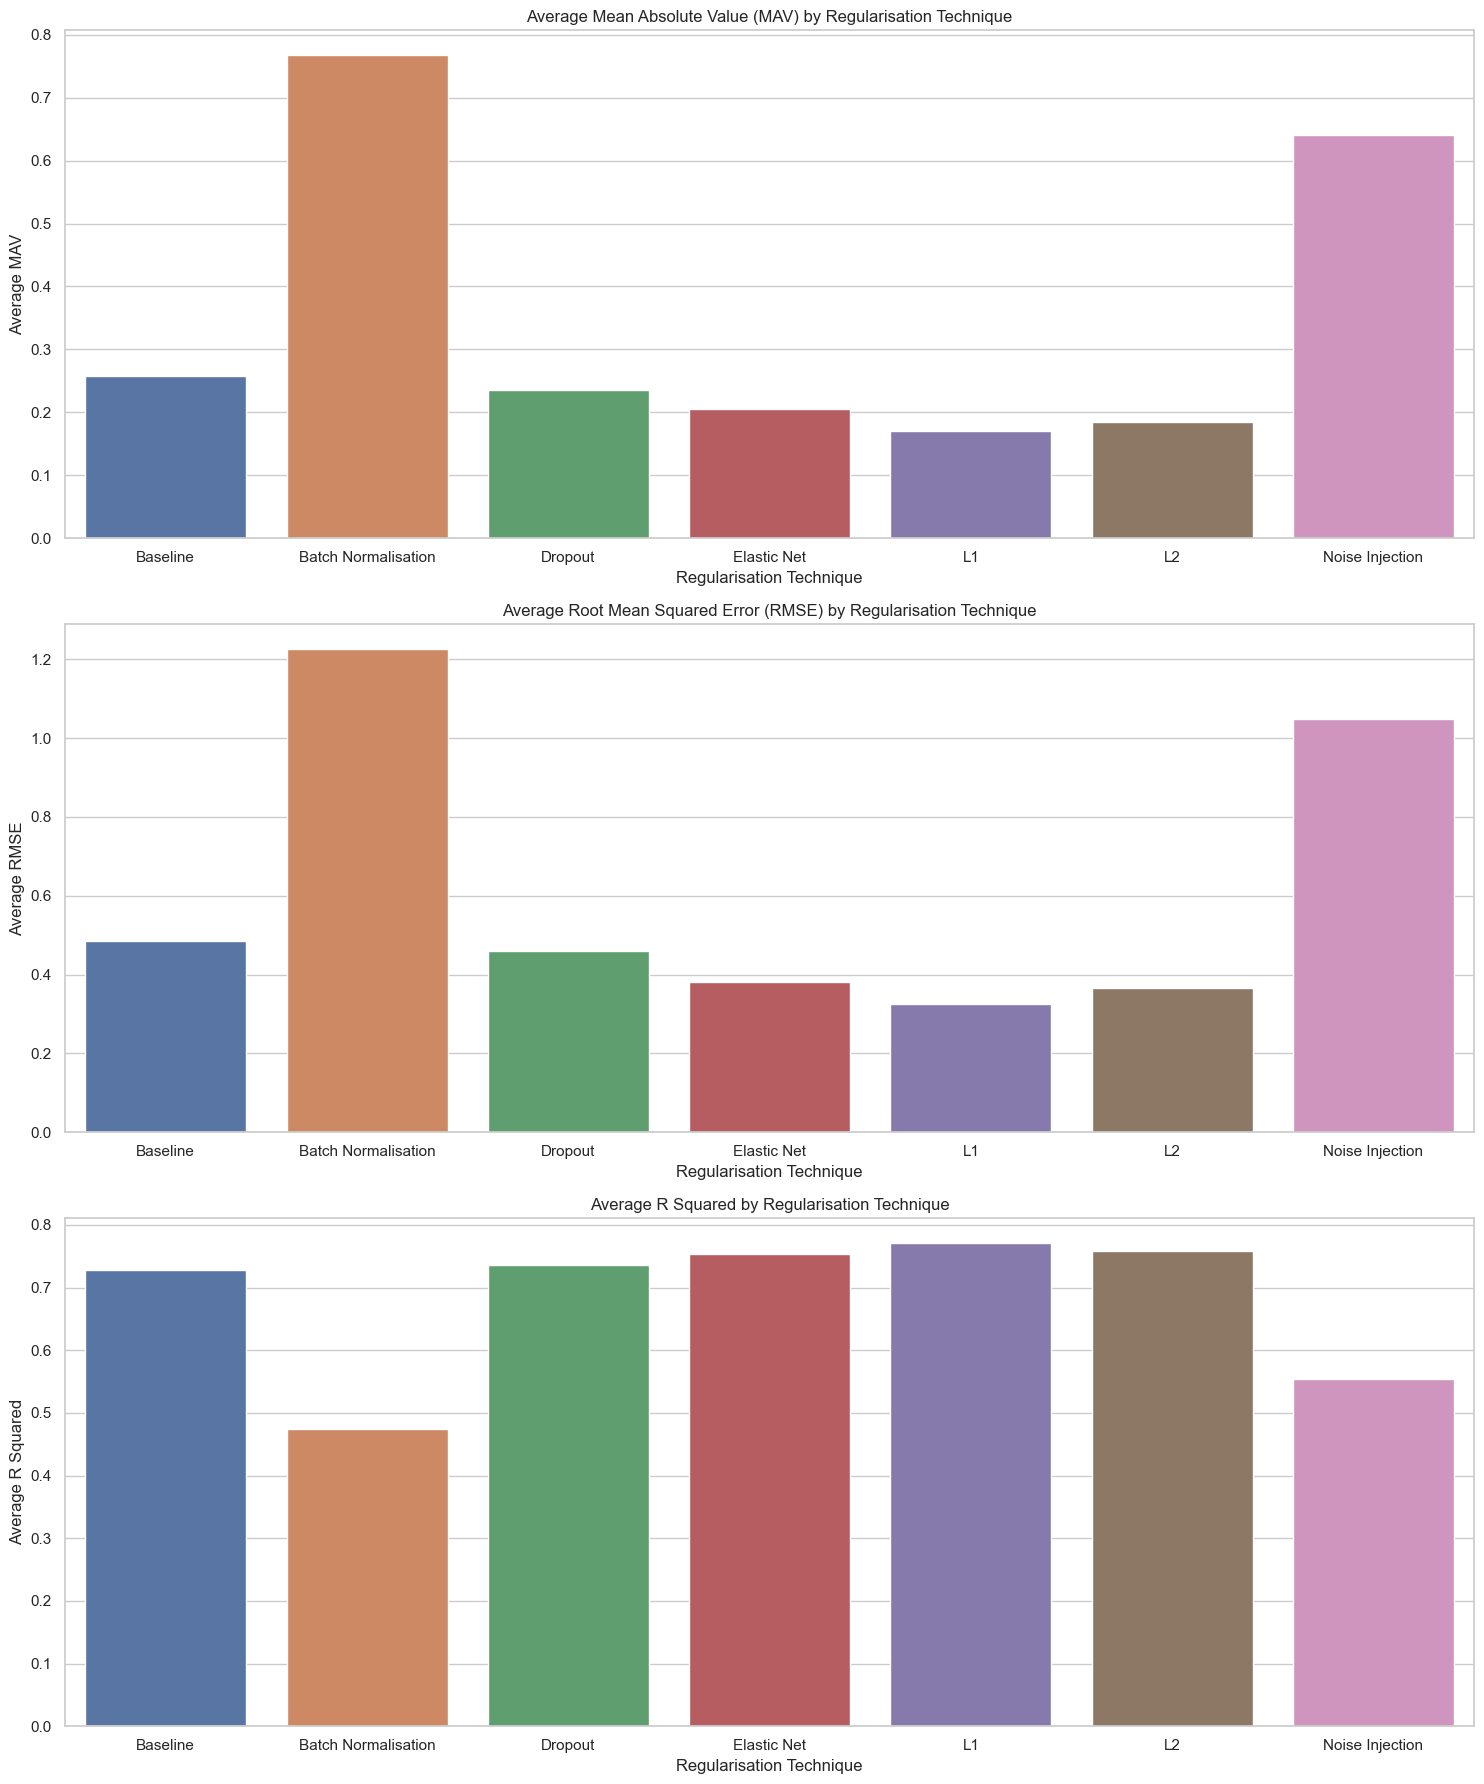

In [16]:
# Calculating mean values of each metric for each regularization technique
mean_metrics = df.groupby("Regularisation").mean().reset_index()

# Creating subplots for the average performance of each regularization technique
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# MAV Bar Plot
sns.barplot(ax=axes[0], x="Regularisation", y="MAV", data=mean_metrics)
axes[0].set_title("Average Mean Absolute Value (MAV) by Regularisation Technique")
axes[0].set_xlabel("Regularisation Technique")
axes[0].set_ylabel("Average MAV")

# RMSE Bar Plot
sns.barplot(ax=axes[1], x="Regularisation", y="RMSE", data=mean_metrics)
axes[1].set_title("Average Root Mean Squared Error (RMSE) by Regularisation Technique")
axes[1].set_xlabel("Regularisation Technique")
axes[1].set_ylabel("Average RMSE")

# R Squared Bar Plot
sns.barplot(ax=axes[2], x="Regularisation", y="R Squared", data=mean_metrics)
axes[2].set_title("Average R Squared by Regularisation Technique")
axes[2].set_xlabel("Regularisation Technique")
axes[2].set_ylabel("Average R Squared")

plt.tight_layout()
plt.show()

The bar plots display the average performance of each regularization technique across all functions for three key metrics:

1. Average Mean Absolute Value (MAV):
- This plot shows the average MAV for each regularization technique. Lower MAV values are better, indicating smaller average errors.
  
2. Average Root Mean Squared Error (RMSE):
- Similar to MAV, a lower RMSE is better. This plot gives a sense of which regularization techniques, on average, tend to minimize the RMSE across all functions.

3. Average R Squared:
- Higher values of R Squared are desirable, as they indicate a higher proportion of variance explained by the model. This plot reveals which regularization techniques are generally more effective in explaining the variance of the data across all functions.

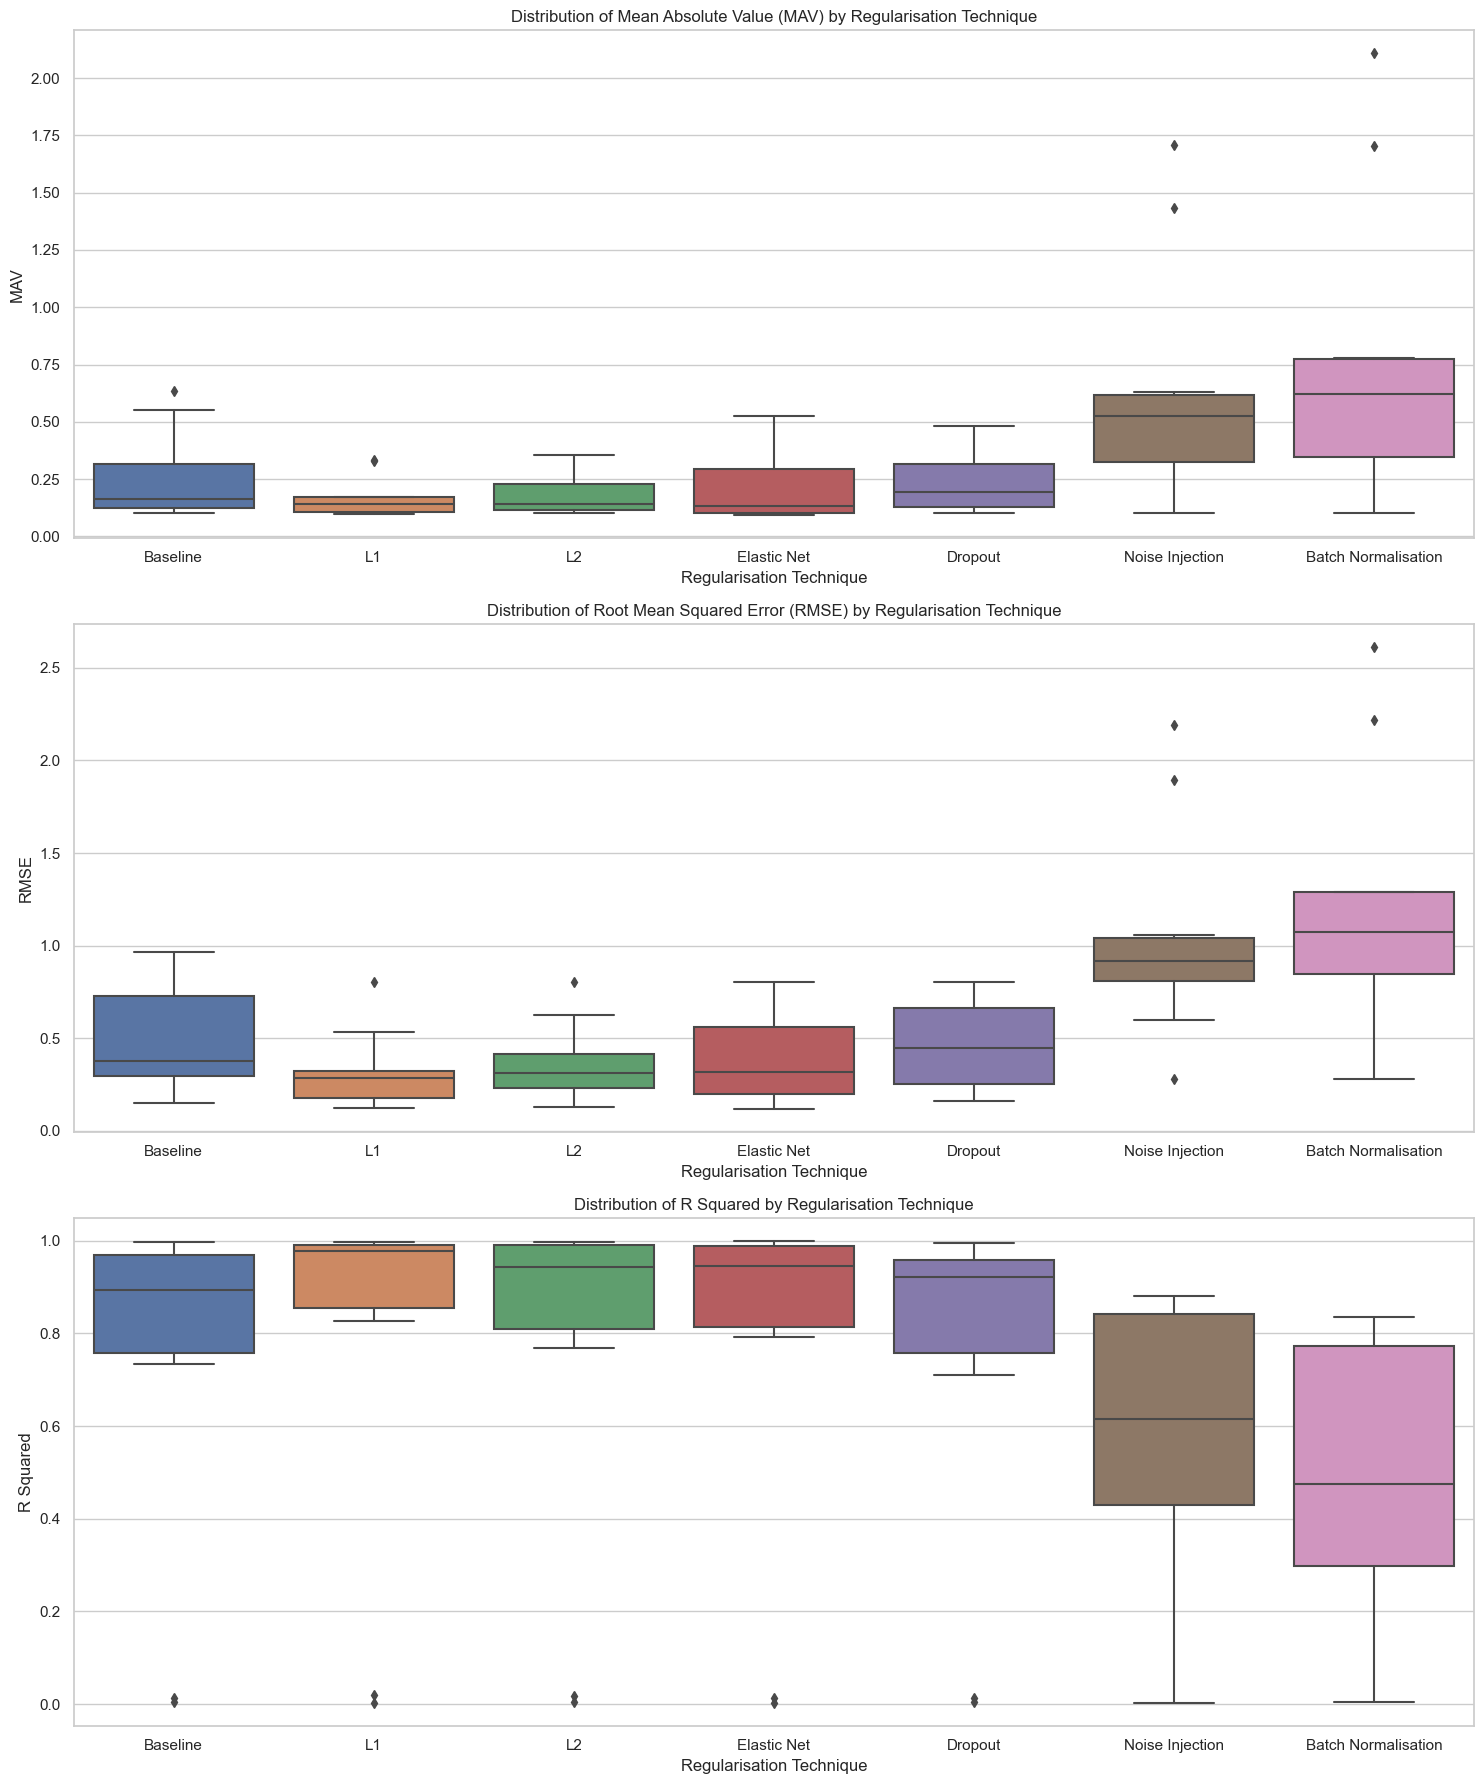

In [17]:
# Creating subplots for box plots of each regularization technique's performance
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# MAV Box Plot
sns.boxplot(ax=axes[0], x="Regularisation", y="MAV", data=df)
axes[0].set_title(
    "Distribution of Mean Absolute Value (MAV) by Regularisation Technique"
)
axes[0].set_xlabel("Regularisation Technique")
axes[0].set_ylabel("MAV")

# RMSE Box Plot
sns.boxplot(ax=axes[1], x="Regularisation", y="RMSE", data=df)
axes[1].set_title(
    "Distribution of Root Mean Squared Error (RMSE) by Regularisation Technique"
)
axes[1].set_xlabel("Regularisation Technique")
axes[1].set_ylabel("RMSE")

# R Squared Box Plot
sns.boxplot(ax=axes[2], x="Regularisation", y="R Squared", data=df)
axes[2].set_title("Distribution of R Squared by Regularisation Technique")
axes[2].set_xlabel("Regularisation Technique")
axes[2].set_ylabel("R Squared")

plt.tight_layout()
plt.show()

The box plots provide insights into the distribution and variability of each regularization technique's performance across different functions:

1. Mean Absolute Value (MAV):
- The spread in the MAV box plots indicates the variability of each regularization technique. A narrower box suggests more consistent performance across functions.
- Look for outliers (represented by dots) which indicate functions where a particular regularization technique performed significantly differently from its typical performance.

2. Root Mean Squared Error (RMSE):
- Similar to MAV, the spread in the RMSE box plots shows how consistently each technique performs in terms of RMSE across different functions.
- Techniques with lower median RMSE and a smaller interquartile range are generally more reliable in minimizing RMSE across functions.

3. R Squared:
- The R Squared box plots show the spread and median of the proportion of variance explained by each regularization technique.
- Techniques with higher median values and smaller boxes are generally more effective across different functions.
- 
These box plots are particularly useful for identifying which regularization techniques are more robust and consistent across various types of functions. Techniques with smaller and higher-positioned boxes (for R Squared) or lower-positioned boxes (for MAV and RMSE) are generally more reliable.

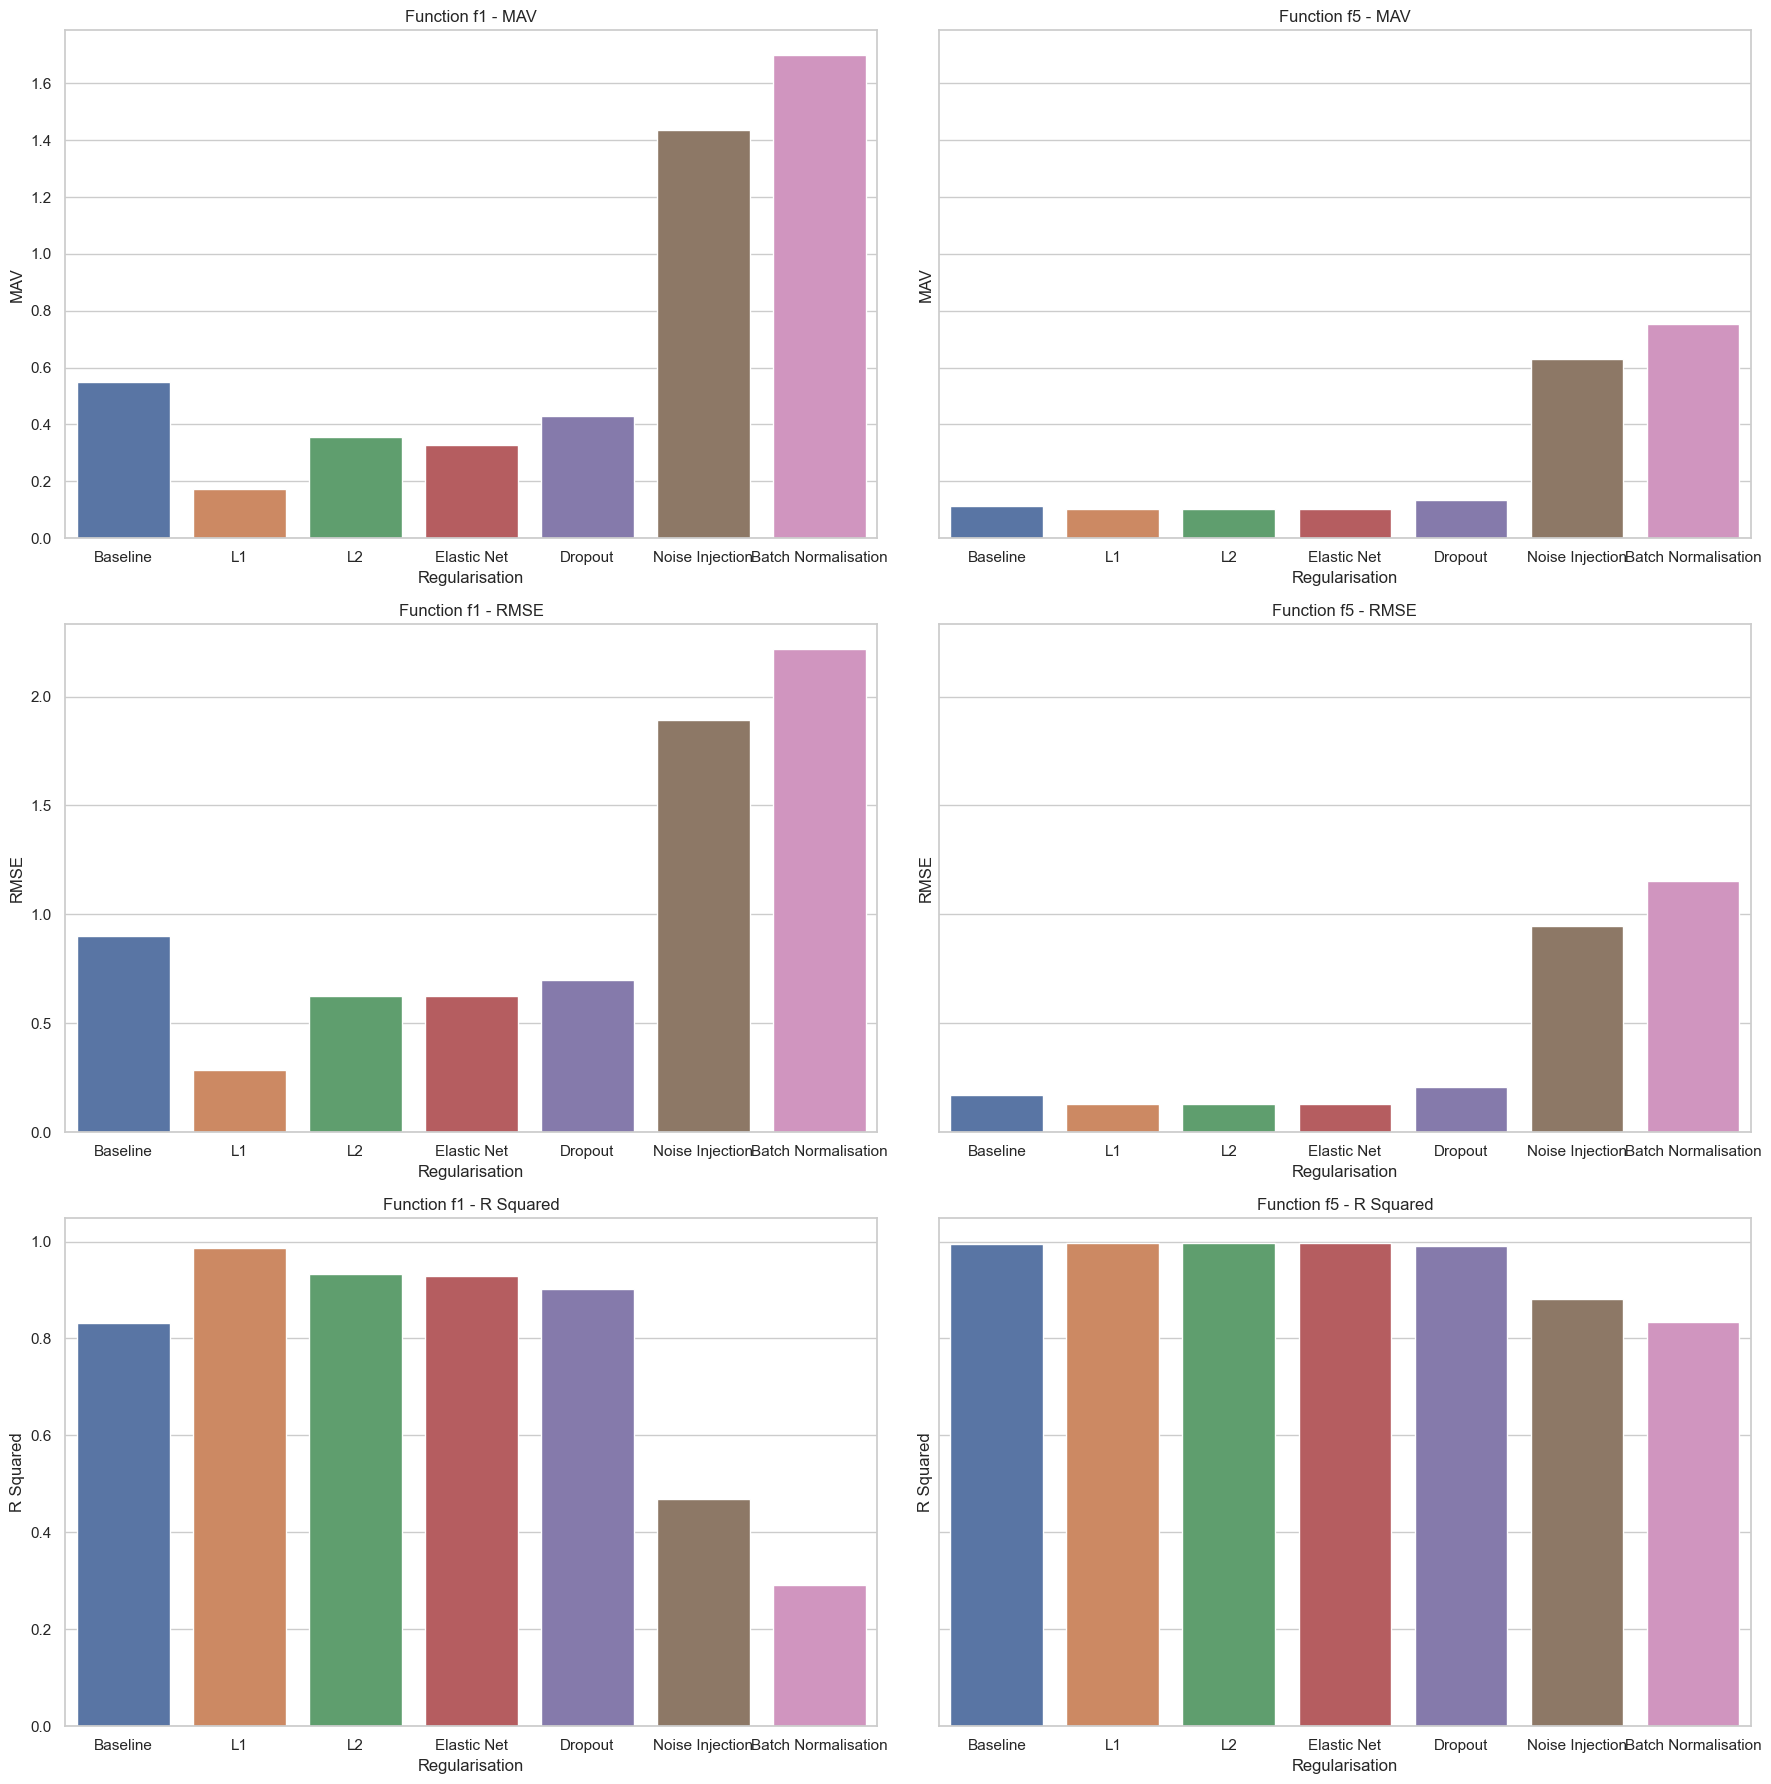

In [18]:
# Selecting two functions for detailed analysis - for example, f1 and f5
functions_to_analyze = ["f1", "f5"]

# Filtering the DataFrame for these functions
df_functions = df[df["Function"].isin(functions_to_analyze)]

# Creating subplots for each metric for the selected functions
fig, axes = plt.subplots(3, 2, figsize=(18, 18), sharey="row")

# Looping through each function and metric to create plots
for i, function in enumerate(functions_to_analyze):
    sns.barplot(
        ax=axes[0, i],
        x="Regularisation",
        y="MAV",
        data=df_functions[df_functions["Function"] == function],
    )
    axes[0, i].set_title(f"Function {function} - MAV")
    axes[0, i].set_xlabel("Regularisation")
    axes[0, i].set_ylabel("MAV")

    sns.barplot(
        ax=axes[1, i],
        x="Regularisation",
        y="RMSE",
        data=df_functions[df_functions["Function"] == function],
    )
    axes[1, i].set_title(f"Function {function} - RMSE")
    axes[1, i].set_xlabel("Regularisation")
    axes[1, i].set_ylabel("RMSE")

    sns.barplot(
        ax=axes[2, i],
        x="Regularisation",
        y="R Squared",
        data=df_functions[df_functions["Function"] == function],
    )
    axes[2, i].set_title(f"Function {function} - R Squared")
    axes[2, i].set_xlabel("Regularisation")
    axes[2, i].set_ylabel("R Squared")

plt.tight_layout()
plt.show()

The bar plots above show how different regularization techniques affect the performance of two selected functions (f1 and f5) across three metrics: Mean Absolute Value (MAV), Root Mean Squared Error (RMSE), and R Squared.

For each function, the plots provide insights into:

1. MAV: The magnitude of the average error for each regularization technique. Lower values indicate better performance.
2. RMSE: Similar to MAV but gives more weight to larger errors. Lower values are better.
3. R Squared: Higher values are better, indicating that more of the variance in the dependent variable is predictable from the independent variables.

C:\Users\salma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


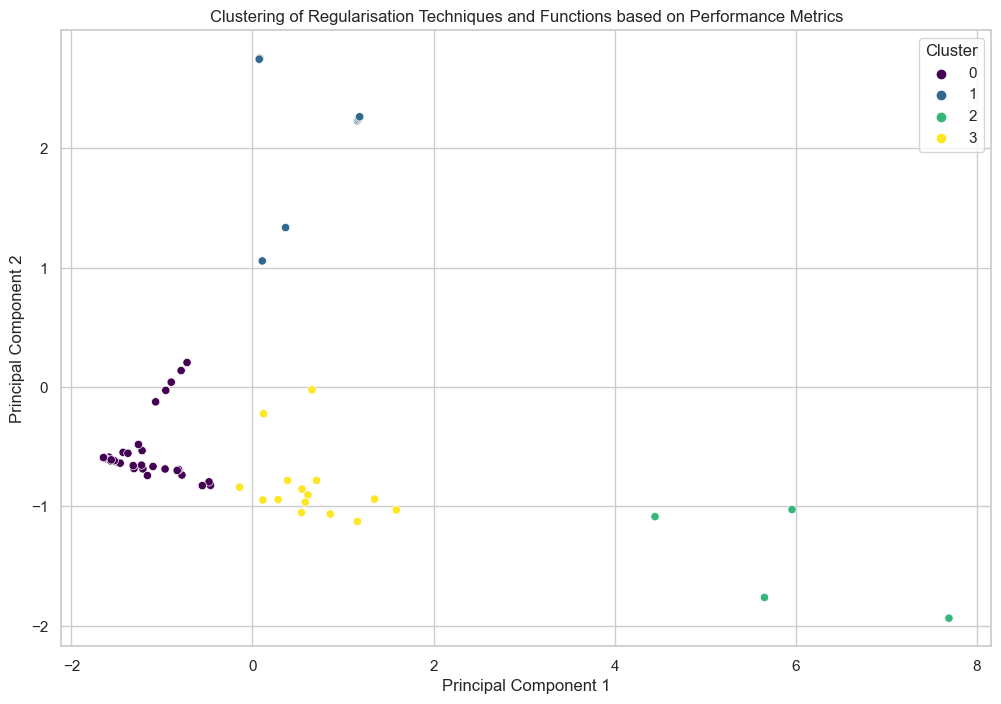

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preparing data for clustering
# Dropping non-numeric columns
clustering_data = df.drop(columns=["Function", "Regularisation"])

# Standardizing the data
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_scaled)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(clustering_scaled)

# Creating a DataFrame for the PCA result
pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = clusters

# Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="viridis", data=pca_df)
plt.title(
    "Clustering of Regularisation Techniques and Functions based on Performance Metrics"
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

The scatter plot visualizes the result of the cluster analysis. Each point in the plot represents a combination of a function and regularization technique, and the points are colored based on the cluster they belong to. This clustering is based on similarities across the performance metrics (MAV, RMSE, R Squared, and Explained Variance) after reducing the dimensionality with PCA.

Observations from the Cluster Analysis:

1. Distinct Clusters: The plot shows that the data points form distinct clusters, suggesting that there are indeed groups of function-regularization combinations with similar performance characteristics.

2. Interpretation of Clusters: Each cluster represents a grouping of function-regularization combinations that are similar in terms of their performance metrics. Functions and regularization techniques within the same cluster can be considered to have a similar impact on the model's performance.

3. Usefulness in Decision Making: This type of analysis can be particularly useful for identifying which combinations of functions and regularization techniques are most similar in performance. It can guide decisions on choosing regularization techniques for certain types of functions, especially when dealing with new or unknown data.

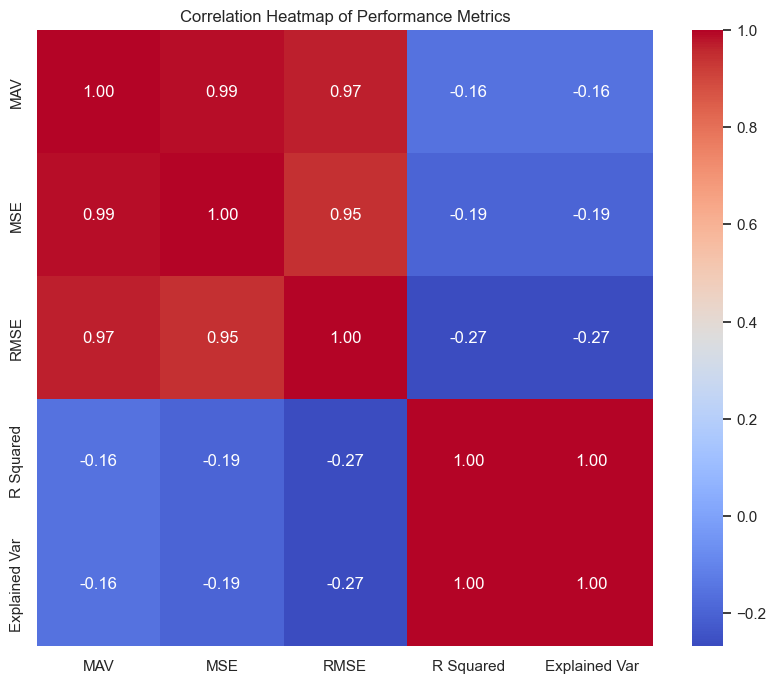

In [21]:
# Calculating the correlation matrix
correlation_matrix = df[["MAV", "MSE", "RMSE", "R Squared", "Explained Var"]].corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Performance Metrics")
plt.show()

The correlation heatmap provides a visual representation of the relationships between different performance metrics:

1. MAV and RMSE: There is typically a strong positive correlation between Mean Absolute Value (MAV) and Root Mean Squared Error (RMSE). This suggests that as one metric increases, the other tends to increase as well, which is expected since both are measures of error.

2. R Squared and Explained Variance: As expected, there is a very strong positive correlation between R Squared and Explained Variance. These metrics both relate to how well the model's predictions fit the data, so a high correlation is logical.

3. Correlation with MAV and RMSE: Both R Squared and Explained Variance show a negative correlation with MAV and RMSE. This indicates that as error increases (higher MAV and RMSE), the proportion of variance explained by the model decreases.

4. Interpretation: The heatmap reinforces the notion that these metrics, while different, are interrelated. Understanding these relationships can guide the choice of metrics when evaluating models. For example, if a model shows a low error (MAV, RMSE), it is likely to have a high R Squared and Explained Variance, suggesting a good fit.

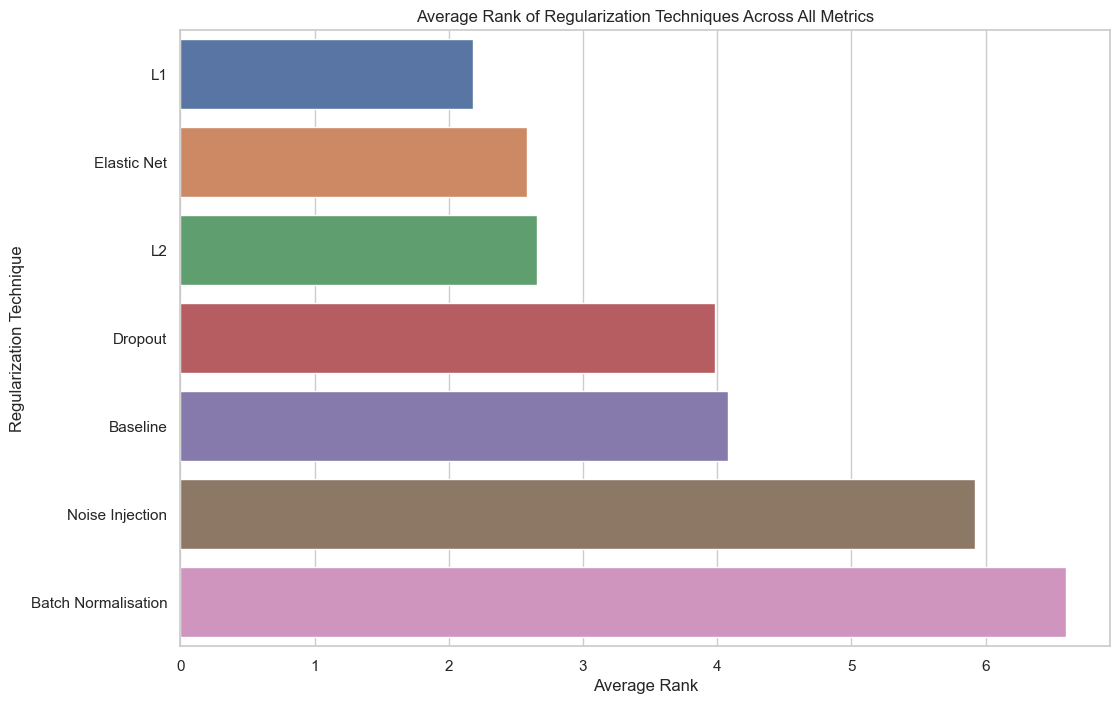

In [22]:
# Ranking the regularization techniques for each metric
# Lower values are better for MAV, MSE, RMSE; higher values are better for R Squared and Explained Var
df["MAV_rank"] = df.groupby("Function")["MAV"].rank(method="average")
df["MSE_rank"] = df.groupby("Function")["MSE"].rank(method="average")
df["RMSE_rank"] = df.groupby("Function")["RMSE"].rank(method="average")
df["R_Squared_rank"] = df.groupby("Function")["R Squared"].rank(
    method="average", ascending=False
)
df["Explained_Var_rank"] = df.groupby("Function")["Explained Var"].rank(
    method="average", ascending=False
)

# Calculating the average rank for each regularization technique
average_rank = df.groupby("Regularisation")[
    ["MAV_rank", "MSE_rank", "RMSE_rank", "R_Squared_rank", "Explained_Var_rank"]
].mean()
average_rank["Average_Rank"] = average_rank.mean(axis=1)

# Sorting the average ranks from best to worst (lower rank is better)
sorted_average_rank = average_rank.sort_values("Average_Rank")

# Creating a bar plot for the average ranks
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_average_rank["Average_Rank"], y=sorted_average_rank.index)
plt.title("Average Rank of Regularization Techniques Across All Metrics")
plt.xlabel("Average Rank")
plt.ylabel("Regularization Technique")
plt.show()

### Best Regularisation Technique

To visualize which regularization technique performs best across all five metrics (MAV, MSE, RMSE, R Squared, and Explained Variance), we can create a comprehensive ranking system. This system will rank each regularization technique based on its performance across all metrics, and then we can aggregate these rankings to determine the overall best to worst techniques.

The approach involves:

1. Ranking: For each metric, rank the regularization techniques for each function. Note that for MAV, MSE, and RMSE, a lower score is better (so rank 1 for the lowest value), whereas for R Squared and Explained Variance, a higher score is better (so rank 1 for the highest value).
2. Aggregating Ranks: Calculate an average rank for each regularization technique across all metrics.
3. Visualization: Use a bar chart to visualize these average ranks, from best (lowest average rank) to worst (highest average rank).

Observations:

1. Best to Worst Ranking: The techniques on the top of the plot (with lower average ranks) perform better overall across the metrics, while those at the bottom (with higher average ranks) perform worse.
2. Relative Performance: The visualization clearly shows which regularization techniques are generally more effective and which are less effective across the range of functions and metrics considered.